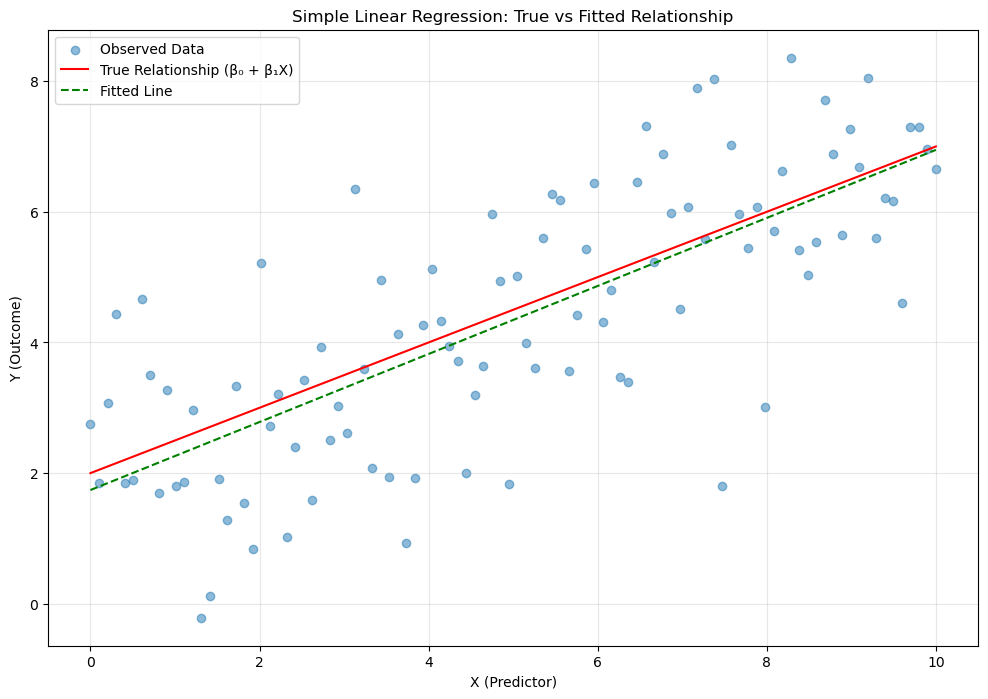


Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7408      0.272      6.411      0.000       1.202       2.280
X              0.5207      0.047     11.099      0.000       0.428       0.614


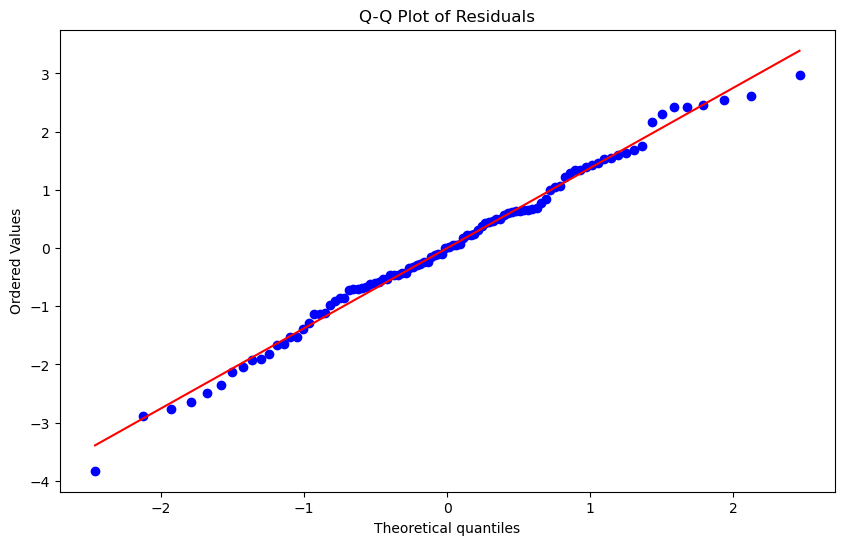

In [5]:
#Q3
#link:https://chatgpt.com/share/671d9e92-aa54-8009-bb3f-7871a6f027c7

#Difference Between Lines:
#The red line (Y_true) shows the true underlying relationship we used to generate the data
#The green dashed line shows the fitted relationship based on the observed data
#Difference:
            #The fitted line is influenced by the random errors we added
            #It's an estimate based on one sample of data
            #With different random samples, we'd get slightly different fitted lines
            #The true line represents the relationship we'd see with infinite data points

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf


np.random.seed(42)

n = 100  # sample size
beta_0 = 2  # true intercept
beta_1 = 0.5  # true slope
sigma = 1.5  # standard deviation of errors

X = np.linspace(0, 10, n)

epsilon = np.random.normal(0, sigma, n)


Y_true = beta_0 + beta_1 * X

Y_obs = Y_true + epsilon

df = pd.DataFrame({
    'X': X,
    'Y': Y_obs
})

model = smf.ols('Y ~ X', data=df).fit()

plt.figure(figsize=(12, 8))

plt.scatter(X, Y_obs, alpha=0.5, label='Observed Data')

plt.plot(X, Y_true, 'r-', label='True Relationship (β₀ + β₁X)')

plt.plot(X, model.predict(), 'g--', label='Fitted Line')

plt.xlabel('X (Predictor)')
plt.ylabel('Y (Outcome)')
plt.title('Simple Linear Regression: True vs Fitted Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nModel Summary:")
print(model.summary().tables[1])

plt.figure(figsize=(10, 6))
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


Model Parameters:
Intercept (β₀): 1.7408
Slope (β₁): 0.5207

Comparing first 5 fitted values:
   Manual Calculation  Model Fitted Values  Difference
0            1.740781             1.740781         0.0
1            1.793376             1.793376         0.0
2            1.845971             1.845971         0.0
3            1.898566             1.898566         0.0
4            1.951160             1.951160         0.0


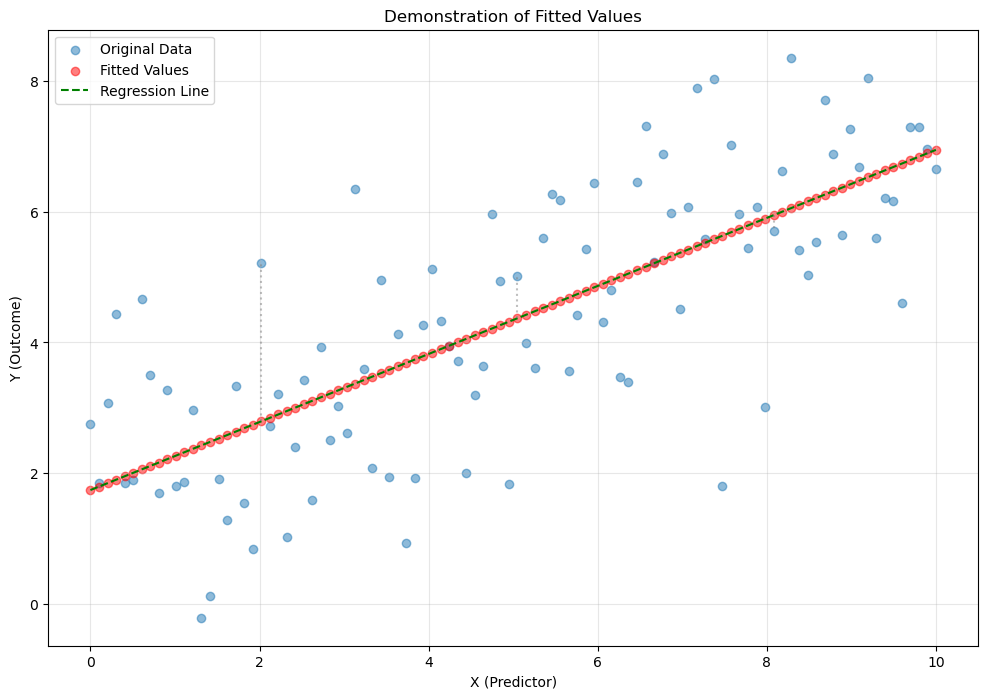


First 5 residuals:
0    1.004291
1    0.049733
2    1.226572
3    2.537494
4   -0.100370
dtype: float64


In [6]:
#Q4
#link:https://chatgpt.com/share/671d9e92-aa54-8009-bb3f-7871a6f027c7

#Source of Parameters:
#Parameters (coefficients) are stored in fitted_model.params
#These can be viewed in fitted_model.summary().tables[1]

#Calculation Formula:
            #Copyfitted_values = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
#Where β are the parameters and x are the predictor values
#Implementation:

#Multiply each predictor by its coefficient
#Sum all products plus intercept
#esults stored in fitted_model.fittedvalues

#Matrix Form:
    #fitted_values = X @ coefficients + intercept

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

np.random.seed(42)

n = 100
X = np.linspace(0, 10, n)
beta_0 = 2
beta_1 = 0.5
epsilon = np.random.normal(0, 1.5, n)
Y = beta_0 + beta_1 * X + epsilon

df = pd.DataFrame({'X': X, 'Y': Y})
fitted_model = smf.ols('Y ~ X', data=df).fit()

intercept, slope = fitted_model.params.values

print("Model Parameters:")
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Slope (β₁): {slope:.4f}\n")

manual_fitted_values = intercept + slope * X

print("Comparing first 5 fitted values:")
comparison_df = pd.DataFrame({
    'Manual Calculation': manual_fitted_values,
    'Model Fitted Values': fitted_model.fittedvalues,
    'Difference': manual_fitted_values - fitted_model.fittedvalues
})
print(comparison_df.head())

plt.figure(figsize=(12, 8))

plt.scatter(X, Y, alpha=0.5, label='Original Data')

plt.scatter(X, fitted_model.fittedvalues, color='red', alpha=0.5, label='Fitted Values')

plt.plot(X, manual_fitted_values, 'g--', label='Regression Line')

for i in [20, 50, 80]:
    plt.vlines(x=X[i], ymin=manual_fitted_values[i], ymax=Y[i], 
               colors='gray', linestyles=':', alpha=0.5)

plt.xlabel('X (Predictor)')
plt.ylabel('Y (Outcome)')
plt.title('Demonstration of Fitted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

residuals = Y - fitted_model.fittedvalues
print("\nFirst 5 residuals:")
print(residuals.head())

#Q9
#link:https://chatgpt.com/share/671d9e92-aa54-8009-bb3f-7871a6f027c7

For wait times < 62 minutes:

Looking at the scatter plot, there appears to be a weaker relationship
The slope coefficient would be smaller than in the full dataset
The p-value for the 'waiting' coefficient would help us evaluate the null hypothesis (H₀: β₁ = 0)


For wait times < 64 minutes:

Similar analysis as above, but with slightly more data points
We'd expect similar but possibly different statistical significance


For wait times < 66 minutes:

This includes even more data points
The relationship pattern might become more evident



To properly characterize the evidence against the null hypothesis, we should:

Compare the p-values for the 'waiting' coefficient across all three limits
Look at the coefficient magnitudes and their standard errors
Consider the R-squared values to assess model fit

#Q11
#link:https://chatgpt.com/share/671da878-b3b4-8009-99cf-311607868e15

Differences:

New Indicator Model (duration ~ C(kind)):

Binary categorization (short/long) at 68 minutes
Compares group means only
Uses indicator variable (0/1)
Simpler interpretation

Previous Models (duration ~ waiting):

Used continuous wait times
Estimated slope relationships
Split into separate analyses for ranges
More complex relationships

Provides a streamlined approach to testing for significant differences between groups, unifying the analysis of short and long wait times and simplifying hypothesis testing.
